<a href="https://colab.research.google.com/github/RakshanURK20CS1154/Dataset/blob/main/URK20CS1154_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ex.2 Feature Selection and Extraction**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import Binarizer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , MinMaxScaler
from sklearn.feature_selection import SelectPercentile , chi2 , SelectKBest , VarianceThreshold

**1) Read and analyze the data**





In [ ]:
df = pd.read_csv("/content/Toyato - Toyato.csv")
df.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,12950,23,10,2002,46986,Diesel,90,1,0,2000,3.0,Five,210,1165,0.0,1,3
1,12950,23,10,2002,72937,Diesel,90,1,0,2000,3.0,Five,210,1165,0.0,1,3
2,12950,24,9,2002,41711,Diesel,90,1,0,2000,3.0,Five,210,1165,1.0,1,3
3,13950,26,7,2002,48000,Diesel,90,0,0,2000,3.0,Five,210,1165,1.0,1,4
4,17950,30,3,2002,38500,Diesel,90,0,0,2000,3.0,Five,210,1170,1.0,1,5


In [ ]:
df.describe()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
count,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,44.000000,50.000000,50.000000,27.000000,50.000000,50.000000
mean,15100.100000,26.280000,6.720000,2002.0,45948.100000,113.060000,0.600000,0.020000,1694.000000,3.272727,124.940000,1150.800000,0.555556,0.940000,4.260000
std,2532.036063,3.162536,3.162536,0.0,23939.252576,35.848553,0.494872,0.141421,237.684407,0.694284,63.757004,56.436347,0.506370,0.239898,2.716616
min,11500.000000,22.000000,1.000000,2002.0,9750.000000,69.000000,0.000000,0.000000,1400.000000,3.000000,19.000000,1065.000000,0.000000,0.000000,3.000000
25%,12950.000000,23.000000,4.000000,2002.0,28715.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,85.000000,1100.000000,0.000000,1.000000,3.000000
50%,14950.000000,27.000000,6.000000,2002.0,41563.000000,97.000000,1.000000,0.000000,1600.000000,3.000000,85.000000,1120.000000,1.000000,1.000000,3.000000
75%,16625.000000,29.000000,10.000000,2002.0,63519.250000,110.000000,1.000000,0.000000,2000.000000,3.000000,210.000000,1185.000000,1.000000,1.000000,5.000000
max,22500.000000,32.000000,11.000000,2002.0,110404.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,234.000000,1270.000000,1.000000,1.000000,18.000000


**2) Split the dataset into train and test sets.**

In [ ]:
df_train , df_test = train_test_split(df)

**3) Check shape of training and test sets**

In [ ]:
print("Train size : ",df_train.shape)
print("Test  size : ",df_test.shape)

Train size :  (37, 17)
Test  size :  (13, 17)


**4) Perform scaling in the data using Standard Scalar**

In [ ]:
tmp_df = df.copy(True)
tmp_df.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,12950,23,10,2002,46986,Diesel,90,1,0,2000,3.0,Five,210,1165,0.0,1,3
1,12950,23,10,2002,72937,Diesel,90,1,0,2000,3.0,Five,210,1165,0.0,1,3
2,12950,24,9,2002,41711,Diesel,90,1,0,2000,3.0,Five,210,1165,1.0,1,3
3,13950,26,7,2002,48000,Diesel,90,0,0,2000,3.0,Five,210,1165,1.0,1,4
4,17950,30,3,2002,38500,Diesel,90,0,0,2000,3.0,Five,210,1170,1.0,1,5


In [ ]:
scaler = StandardScaler()
cols   = []

for col in tmp_df.columns:
  if col in ["Mfg_Year","Doors","Guarantee_Period","Mfg_Month"]:
    continue

  if tmp_df[col].dtype == "int64" or tmp_df[col].dtype == "float64":
    cols.append(col)

tmp_df[cols] = scaler.fit_transform(tmp_df[cols])

In [ ]:
tmp_df.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,-0.857780,-1.047672,10,2002,0.043796,Diesel,-0.649792,0.816497,-0.142857,1.300492,3.0,Five,1.347673,0.254165,-1.118034,0.252646,3
1,-0.857780,-1.047672,10,2002,1.138837,Diesel,-0.649792,0.816497,-0.142857,1.300492,3.0,Five,1.347673,0.254165,-1.118034,0.252646,3
2,-0.857780,-0.728260,9,2002,-0.178791,Diesel,-0.649792,0.816497,-0.142857,1.300492,3.0,Five,1.347673,0.254165,0.894427,0.252646,3
3,-0.458831,-0.089435,7,2002,0.086583,Diesel,-0.649792,-1.224745,-0.142857,1.300492,3.0,Five,1.347673,0.254165,0.894427,0.252646,4
4,1.136964,1.188213,3,2002,-0.314284,Diesel,-0.649792,-1.224745,-0.142857,1.300492,3.0,Five,1.347673,0.343660,0.894427,0.252646,5


In [ ]:
scaler = MinMaxScaler()#subtracting the min value and divide the range
cols   = []

for col in df.columns:
  if col in ["Mfg_Year","Doors","Guarantee_Period","Mfg_Month"]:
    continue

  if df[col].dtype == "int64" or df[col].dtype == "float64":
    cols.append(col)

df[cols] = scaler.fit_transform(df[cols])
df.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period
0,0.131818,0.1,10,2002,0.369941,Diesel,0.170732,1.0,0.0,1.0,3.0,Five,0.888372,0.487805,0.0,1.0,3
1,0.131818,0.1,10,2002,0.627764,Diesel,0.170732,1.0,0.0,1.0,3.0,Five,0.888372,0.487805,0.0,1.0,3
2,0.131818,0.2,9,2002,0.317533,Diesel,0.170732,1.0,0.0,1.0,3.0,Five,0.888372,0.487805,1.0,1.0,3
3,0.222727,0.4,7,2002,0.380015,Diesel,0.170732,0.0,0.0,1.0,3.0,Five,0.888372,0.487805,1.0,1.0,4
4,0.586364,0.8,3,2002,0.285632,Diesel,0.170732,0.0,0.0,1.0,3.0,Five,0.888372,0.512195,1.0,1.0,5


**5) Calculate the % of missing values in a column.**

In [ ]:
df_len = len(df)
miss_percent = {}
for col in df.columns:
  percent = df[col].isnull().sum()/df_len*100
  miss_percent[col] = percent
  print(col,":\n\t",percent,"%")

Price :
	 0.0 %
Age :
	 0.0 %
Mfg_Month :
	 0.0 %
Mfg_Year :
	 0.0 %
KM :
	 0.0 %
Fuel_Type :
	 0.0 %
HP :
	 0.0 %
Met_Color :
	 0.0 %
Automatic :
	 0.0 %
cc :
	 0.0 %
Doors :
	 12.0 %
Gears :
	 0.0 %
Quarterly_Tax :
	 0.0 %
Weight :
	 0.0 %
Mfr_Guarantee :
	 46.0 %
BOVAG_Guarantee :
	 0.0 %
Guarantee_Period :
	 0.0 %


**6) Remove features with missing values (&gt;20%)**

In [ ]:
print("Before : ",df.shape)

for col in miss_percent.keys():
  if(miss_percent[col] > 20):
    df.drop(col,axis=1,inplace=True)

print("After  : ",df.shape)

Before :  (50, 17)
After  :  (50, 16)


**7) If the missing values is &lt;20% ,do data imputation(mean/median)**

In [ ]:
cols = []

print("Cols with missing values < 20%")

df_len = len(df)
miss_percent = {}
for col in df.columns:
  percent = df[col].isnull().sum()/df_len*100
  if(percent < 20 and percent > 0):
    print(col,":",percent,"%")
    cols.append(col)

print("--------------------------------")

for col in cols:
  df[col].fillna(int(df[col].mean()),inplace=True)

print("Cols with missing values < 20%")

df_len = len(df)
miss_percent = {}
for col in df.columns:
  percent = df[col].isnull().sum()/df_len*100
  if(percent < 20 and percent > 0):
    print(col,":",percent,"%")

Cols with missing values < 20%
Doors : 12.0 %
--------------------------------
Cols with missing values < 20%


**8) Remove the outliers.**

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
print("Before Removal:",df.shape,"rows and cols")

drop_indexes = []

for col in df.columns:
  if(df[col].dtype == "float64" or df[col].dtype == "int64"):
    mean = df[col].mean()
    std  = df[col].std()

    for i in range(len(df)):
      val = df.loc[i,col]
      if( ((val-mean)/std) > 3.0):
        drop_indexes.append(i)

df.drop(drop_indexes,inplace=True)    
print("After  Removal:",df.shape,"rows and cols")

Before Removal: (48, 12) rows and cols
After  Removal: (46, 12) rows and cols


**9) Use sklearn variance threshold to find the constant features and display the constant features**

In [ ]:
ord_enc = OrdinalEncoder()
df[["Fuel_Type","Gears"]] = ord_enc.fit_transform(df[["Fuel_Type","Gears"]])

In [ ]:
var_thr = VarianceThreshold(threshold = 0)
var_thr.fit(df)

const_cols = list(df.columns[[not elem for elem in var_thr.get_support()]])

print("Columns with constant features : ", const_cols)

Columns with constant features :  ['Mfg_Year', 'Automatic']


**10) Remove features with low variance**

In [ ]:
print("Before Removal:",df.shape,"rows and cols")

var_thr = VarianceThreshold(threshold = 0)
var_thr.fit(df)

low_var_cols = list(df.columns[[not elem for elem in var_thr.get_support()]])

print("Columns with low variance : ", low_var_cols)
df.drop(low_var_cols,axis=1,inplace=True)
print("After  Removal:",df.shape,"rows and cols")

Before Removal: (48, 16) rows and cols
Columns with low variance :  ['Mfg_Year', 'Automatic']
After  Removal: (48, 14) rows and cols


**11) Remove highly correlated features**

In [ ]:
corr = df.corr()
corr

,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,cc,Doors,Gears,Quarterly_Tax,Weight,BOVAG_Guarantee,Guarantee_Period
Price,1.000000,0.947429,-0.947429,-0.198576,0.140347,0.239202,0.169892,0.024098,-0.287571,0.153709,-0.131115,-0.021580,0.186308,0.085825
Age,0.947429,1.000000,-1.000000,-0.241910,0.186152,0.244698,0.204579,0.006267,-0.312078,0.107355,-0.184082,-0.049933,0.216241,0.143178
Mfg_Month,-0.947429,-1.000000,1.000000,0.241910,-0.186152,-0.244698,-0.204579,-0.006267,0.312078,-0.107355,0.184082,0.049933,-0.216241,-0.143178
KM,-0.198576,-0.241910,0.241910,1.000000,-0.698479,-0.408664,-0.065530,0.547875,0.606991,-0.252352,0.725868,0.597380,0.115164,-0.226830
Fuel_Type,0.140347,0.186152,-0.186152,-0.698479,1.000000,0.457743,0.097654,-0.832136,-0.424706,0.254824,-0.964725,-0.691041,-0.140580,0.177228
HP,0.239202,0.244698,-0.244698,-0.408664,0.457743,1.000000,-0.145208,0.068065,-0.229828,0.822554,-0.337740,0.151205,0.055778,0.188966
Met_Color,0.169892,0.204579,-0.204579,-0.065530,0.097654,-0.145208,1.000000,-0.149437,0.048305,-0.209324,-0.097423,-0.093592,0.044415,0.027522
cc,0.024098,0.006267,-0.006267,0.547875,-0.832136,0.068065,-0.149437,1.000000,0.319119,0.161204,0.857224,0.843453,0.172421,-0.125845
Doors,-0.287571,-0.312078,0.312078,0.606991,-0.424706,-0.229828,0.048305,0.319119,1.000000,-0.142857,0.489099,0.531065,0.078811,-0.025260
Gears,0.153709,0.107355,-0.107355,-0.252352,0.254824,0.822554,-0.209324,0.161204,-0.142857,1.000000,-0.155164,0.224815,0.078811,0.210501


In [ ]:
corr = corr.reset_index(drop=True)

In [ ]:
drop_cols = []

for index,col in enumerate(df.columns):
  if(index == 0):
    continue
  for i in range(index):
    if abs(corr.loc[i,col]) > 0.95:
      drop_cols.append(col)
      continue

print("Columns with high correlation : ",drop_cols)
print()
print("Before Removal:",df.shape,"rows and cols")
df.drop(drop_cols,axis=1,inplace=True)
print("After  Removal:",df.shape,"rows and cols")

Columns with high correlation :  ['Mfg_Month', 'Quarterly_Tax']

Before Removal: (48, 14) rows and cols
After  Removal: (48, 12) rows and cols


**12) Perform Univariate feature selection(SelectKBest, SelectPercentile)**

In [ ]:
#Select KBest-most top feature

Y = df["Price"].astype(int)
X = df.drop(["Price"],axis=1)

df_new = SelectKBest(chi2, k=5).fit_transform(X,Y)
df_new.shape

(48, 5)

In [ ]:
#Select Percentile-most important feature

Y = df["Price"].astype(int)
X = df.drop(["Price"],axis=1)

percentile_select = SelectPercentile(chi2, percentile=50)

df_new = percentile_select.fit_transform(X,Y)
df_new.shape
df_new = pd.DataFrame(df_new,columns=list(X.columns[[ elem for elem in percentile_select.get_support()]]))

**13) Apply Pearson Correlation Coefficient/Spearman’s rank coefficient and find Correlation-Matrix with Heatmap**

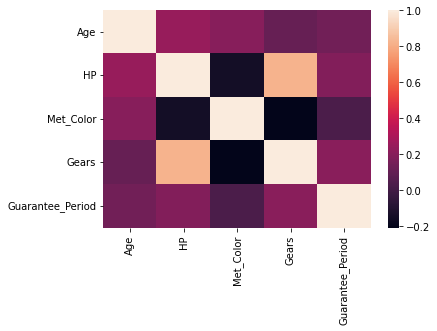

In [ ]:
corr = df_new.corr(method='pearson')
sns.heatmap(corr)

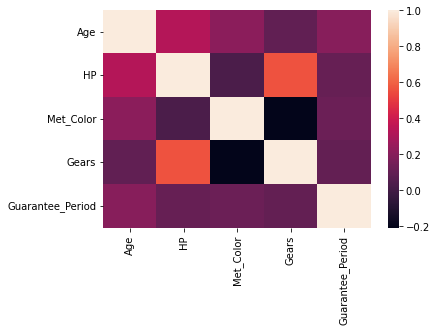

In [ ]:
corr = df_new.corr(method='spearman')
sns.heatmap(corr)

**14) Apply Principal Component Analysis(PCA) for matrix factorization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


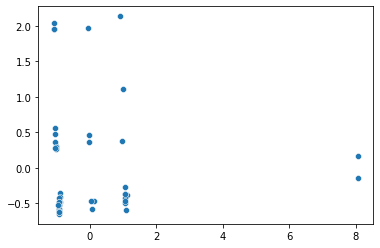

In [ ]:
X = df.drop(["Price"],axis=1)

X = PCA(n_components=2).fit_transform(X)
sns.scatterplot(X[:,0],X[:,1])

**15) Apply Linear Discriminant Analysis (LDA) to perform feature extraction**

In [ ]:
X = df.drop(["Price"],axis=1)
Y = df["Price"].astype(int)

X = LDA(n_components=1).fit_transform(X,Y)
X

array([[-0.55345934],
       [-0.21310557],
       [-0.41423268],
       [-0.85919298],
       [-0.24386027],
       [ 0.59190043],
       [ 0.39622051],
       [ 0.71396829],
       [-1.275542  ],
       [-0.69615702],
       [ 1.12431578],
       [ 1.21574221],
       [ 1.69118176],
       [ 3.64153612],
       [ 3.9340073 ],
       [ 2.14001046],
       [ 0.54342032],
       [-0.87811443],
       [ 0.57151638],
       [ 0.49096135],
       [-0.04571567],
       [-0.36217346],
       [-0.36164172],
       [-1.16069518],
       [-0.5400901 ],
       [-0.03316917],
       [-1.08815053],
       [-0.22247944],
       [-0.09863899],
       [-0.66641814],
       [ 0.30101718],
       [ 0.01049184],
       [ 0.22350521],
       [-0.61280478],
       [-1.05728881],
       [-0.85042389],
       [ 1.16438183],
       [-0.60768151],
       [-1.36697787],
       [ 0.49194894],
       [-1.45641789],
       [-0.08525581],
       [-1.13662753],
       [-1.6178668 ],
       [ 0.45205247],
       [ 0